In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import sys
from scipy.stats import norm, shapiro, anderson
from scipy.spatial.distance import correlation
import statsmodels.api as sm
from scipy.special import comb
from itertools import (chain, combinations)

sys.path.append('/Users/sally/Desktop/ADSP 31007 Stats/Week 9')
import Regression

# Set some options for printing all the columns
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.colheader_justify', 'center')

pd.options.display.float_format = '{:,.2f}'.format

# Load the data from NorthChicagoTownshipHomeSale.csv
df = pd.read_csv('/Users/sally/Desktop/ADSP 31007 Stats/Individual Assignment/Individual Assignment 4/NorthChicagoTownshipHomeSale.csv')

## 1. Data Distribution

### Draw a histogram and a horizontal boxplot for the Sale Price

Text(0.5, 1.0, 'Distribution for Sale Price - Histogram and Horizontal Boxplot')

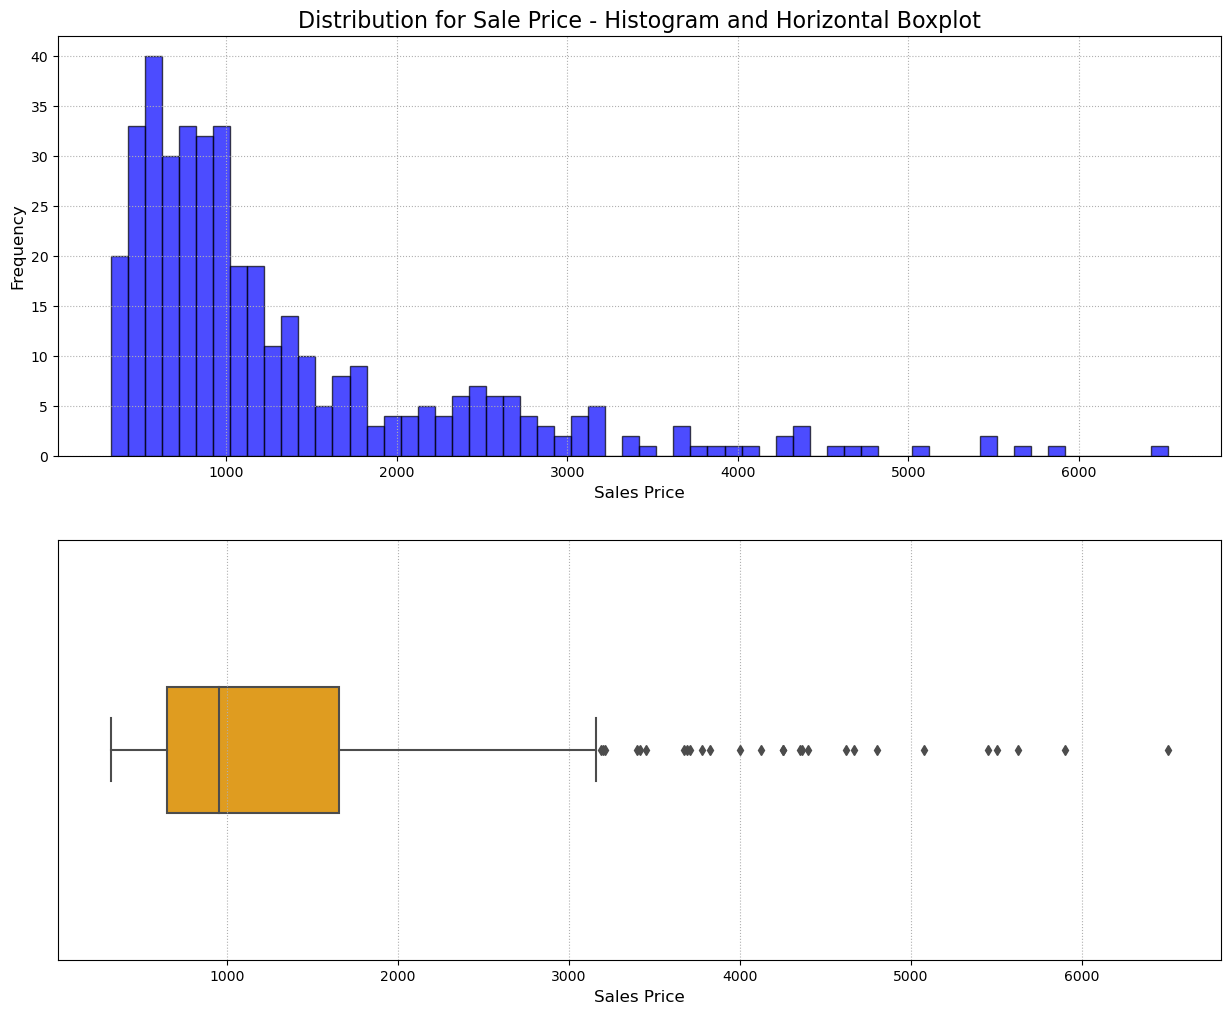

In [2]:
# Set the chart frame
plt.figure(figsize=(15,12))

# Draw the histogram of the Sale Price
ax1 = plt.subplot(2,1,1)
bin_width = 100
bins = range(int(min(df['Sale Price'])), int(max(df['Sale Price'])) + bin_width, bin_width)
(df['Sale Price']).hist(ax=ax1, bins=bins, edgecolor='black', alpha=0.7, color='blue')
ax1.grid(linestyle=':')
ax1.set_xlabel('Sales Price', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Draw the horizontal boxplot for the Sale Price
ax2 = plt.subplot(2,1,2)
sns.boxplot(df['Sale Price'], orient = "h", ax=ax2, width=0.3, color='orange')
ax2.grid(linestyle=':')
ax2.set_xlabel('Sales Price', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax2.yaxis.set_ticks([])

ax1.set_title('Distribution for Sale Price - Histogram and Horizontal Boxplot', fontsize=16)

## 2. Check the distribution of the Log Sale Price

### Using Q-Q Plot, Shapiro-Wilk & Anderson-Darling Test to check if it's normally distributed

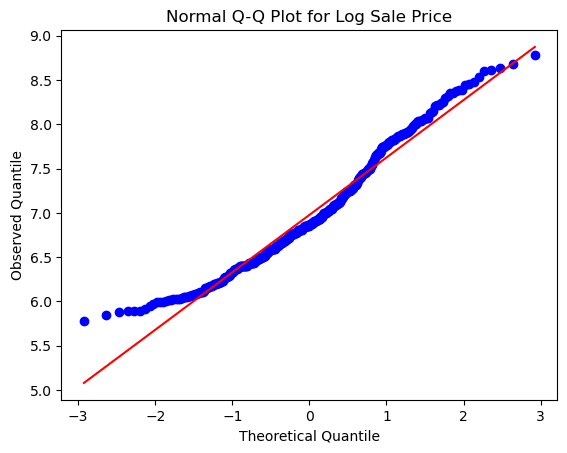


Shapiro Test Statistics =  0.9655884504318237
Shapiro Test p-value =  3.981610774417277e-08

Anderson Test Statistics =  4.041554216991244
Anderson Test Critical Values =  [0.57  0.65  0.779 0.909 1.081]
Anderson Test p-values =  [0.15  0.1   0.05  0.025 0.01 ]


In [3]:
# Apply natural logarithm transformation to SalePrice
df['Log Sale Price'] = np.log(df['Sale Price'])

# Check if LogSalePrice is normally distributed using Q-Q plot
plt.figure()
stats.probplot(df['Log Sale Price'], dist="norm", plot=plt)
plt.title("Normal Q-Q Plot for Log Sale Price")
plt.xlabel("Theoretical Quantile")
plt.ylabel("Observed Quantile")
plt.show()

# Shapiro-Wilk Test
shapiro_test = shapiro(df['Log Sale Price'])
print('\nShapiro Test Statistics = ', shapiro_test[0])
print('Shapiro Test p-value = ', shapiro_test[1])

# Anderson-Darling Test
anderson_test = anderson(df['Log Sale Price'], dist = 'norm')
print('\nAnderson Test Statistics = ', anderson_test[0])
print('Anderson Test Critical Values = ', anderson_test[1])
print('Anderson Test p-values = ', anderson_test[2]/100.00)

## 3. Multiple Linear Regression Model

### Find the Coefficient of Determination of our final model

In [4]:
# Separate predictors and target variable
continuous_feature = df[['Age', 'Bedrooms', 'Building Square Feet', 'Full Baths', 'Garage Size', 'Half Baths', 'Land Acre', 'Tract Median Income']]
target_name = df['Log Sale Price']

# Create a column of ones for the intercept
intercept_column = np.ones((continuous_feature.shape[0], 1))

continuous_feature_with_intercept = pd.DataFrame(np.concatenate((intercept_column, continuous_feature), axis=1), columns=(['Intercept'] + continuous_feature.columns.tolist()))

# Fit the multiple linear regression model
model = sm.OLS(target_name, continuous_feature_with_intercept).fit()

# Get the summary of the regression
print(model.summary())

# Get the coefficient of determination (R-squared)
r_squared = model.rsquared
print(f'\nCoefficient of Determination (R-squared): {r_squared}')

                            OLS Regression Results                            
Dep. Variable:         Log Sale Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     255.4
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          9.39e-151
Time:                        19:01:46   Log-Likelihood:                -33.864
No. Observations:                 403   AIC:                             85.73
Df Residuals:                     394   BIC:                             121.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.5911 

### Find the regression coefficients, their standard errors, and their 95% confidence interval

In [5]:
# Extract coefficients, standard errors, and 95% confidence intervals
coefficients = model.params
std_errors = model.bse
confidence_intervals = model.conf_int(alpha=0.05)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Coefficients': coefficients,
    'Standard Errors': std_errors,
    '95% Conf. Interval (Lower)': confidence_intervals[0],
    '95% Conf. Interval (Upper)': confidence_intervals[1]
})

# Display the results
print(results_df)

                      Coefficients  Standard Errors  95% Conf. Interval (Lower)  95% Conf. Interval (Upper)
Intercept                 5.59           0.10                   5.40                        5.78           
Age                      -0.00           0.00                  -0.01                       -0.00           
Bedrooms                  0.05           0.02                   0.01                        0.09           
Building Square Feet      0.17           0.02                   0.12                        0.21           
Full Baths                0.11           0.02                   0.07                        0.15           
Garage Size               0.02           0.03                  -0.03                        0.08           
Half Baths                0.06           0.03                   0.00                        0.11           
Land Acre                 6.85           0.87                   5.14                        8.56           
Tract Median Income       0.

## 4. Sale Price Prediction

### Find the medians of the eight predictors

In [6]:
# Calculate medians of the eight predictors
medians = continuous_feature.median()

# Display medians
print("Medians of the eight predictors:")
print(medians)

Medians of the eight predictors:
Age                     24.00
Bedrooms                 3.00
Building Square Feet     2.21
Full Baths               2.00
Garage Size              2.00
Half Baths               1.00
Land Acre                0.03
Tract Median Income    122.48
dtype: float64


### FInd the predicted Sale Price and its 95% confidence interval

In [7]:
# Calculate the predicted Log Sale Price
medians = continuous_feature_with_intercept.median()
predicted_log_sale_price = np.dot(medians, model.params)

# Calculate the predicted Sale Price
predicted_sale_price = model.predict(medians)
predicted_sale_price = np.exp(predicted_sale_price)[0]

# Calculate the standard error of the prediction
y_pred = model.predict(continuous_feature_with_intercept)
residuals = target_name - y_pred
mse = np.mean(residuals ** 2)
inv_X = np.linalg.inv((continuous_feature_with_intercept.T) @ (continuous_feature_with_intercept))

se_prediction = ((medians.T @ inv_X @ medians) * mse)**0.5

# Calculate the 95% confidence interval for the predicted Log Sale Price
confidence_interval = (predicted_log_sale_price - 1.96 * se_prediction, predicted_log_sale_price + 1.96 * se_prediction)

# Exponentiate the boundaries to produce the confidence interval for Sale Price
confidence_interval_sale_price = np.exp(confidence_interval)


# Display the results
print("Predicted Log Sale Price:", predicted_log_sale_price)
print("Predicted Sale Price:", predicted_sale_price)
print("95% Confidence Interval for Log Sale Price:", confidence_interval)
print("95% Confidence Interval for Sale Price:", confidence_interval_sale_price)

Predicted Log Sale Price: 6.786745499372981
Predicted Sale Price: 886.0252945694222
95% Confidence Interval for Log Sale Price: (6.739953904528734, 6.8335370942172275)
95% Confidence Interval for Sale Price: [845.5217602287 928.469093929 ]


### Find the Shapley values for the predictors

In [8]:
# Set some options for printing all the columns
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

pd.options.display.float_format = '{:,.10f}'.format

continuous_feature = ['Age', 'Bedrooms', 'Building Square Feet', 'Full Baths', 'Garage Size', 'Half Baths', 'Land Acre', 'Tract Median Income']
target_name = 'Log Sale Price'

train_data = df[[target_name] + continuous_feature]

In [9]:
# Note: there are no missing values in the training data
print('=== Number of Missing Values Per Variable ===')
print(np.sum(train_data.isna()))

n_sample = train_data.shape[0]

# Generate a dataframe that contains the all-possible model specifications

candidate = continuous_feature
n_candidate = len(candidate)
feature_position = []
for i in range(n_candidate):
   feature_position.append('POS_' + str(i))

all_model_spec = pd.DataFrame(chain(*map(lambda x: combinations(candidate, x), range(0, n_candidate+1))),
                                  columns = feature_position)

n_feature_list = []
model_df_list = []
sse_list = []

=== Number of Missing Values Per Variable ===
Log Sale Price          0
Age                     0
Bedrooms                0
Building Square Feet    0
Full Baths              0
Garage Size             0
Half Baths              0
Land Acre               0
Tract Median Income     0
dtype: int64


In [10]:
#Generate the full model matrix and remember each candidate's columns in the full model matrix

X_all = train_data[[]].copy()
X_all.insert(0, 'Intercept', 1.0)

start_column = 0
last_column = 0

component_column = {}
for pred in candidate:
   X_term = train_data[[pred]]
   X_all = X_all.join(X_term)
   start_column = last_column + 1
   last_column = start_column + X_term.shape[1] - 1
   component_column[pred] = [j for j in range(start_column, last_column+1)]

In [11]:
# Train all the model specifications
y = train_data[target_name] 

for idx, row in all_model_spec.iterrows():
   model_column = [0]
   n_feature = 0
   for pos in feature_position:
      pred = row[pos]
      if (pred is not None):
         n_feature = n_feature + 1
         model_column = model_column + component_column[pred]
      else:
         break
   X = X_all.iloc[:, model_column]
   result_list = Regression.LinearRegressionModel (X, y)
   model_df = len(result_list[5])
   SSE =  result_list[2] * result_list[3]

   if (n_feature == 0):
      SST = SSE

   n_feature_list.append(n_feature)
   model_df_list.append(model_df)
   sse_list.append(SSE)

# Add the lists to all_model_spec only if the lengths match
if len(all_model_spec) == len(n_feature_list) == len(model_df_list) == len(sse_list):
    all_model_spec['N_Feature'] = n_feature_list
    all_model_spec['Model DF'] = model_df_list
    all_model_spec['RSquare'] = 1.0 - sse_list / SST
else:
    print("Length mismatch: Unable to add columns to all_model_spec.")


In [12]:
# Make the model specifications as a Python set

model_k_spec = {}
for k in range(0, n_candidate+1):
   subset = all_model_spec[all_model_spec['N_Feature'] == k]
   out_list = []
   for idx, row in subset.iterrows():
      cur_rsq = row['RSquare']
      cur_set = set(list(row[feature_position].dropna()))
      out_list.append([cur_set, cur_rsq])
   model_k_spec[k] = pd.DataFrame(out_list, columns = ['FeatureSet','RSquare'])

In [13]:
# Find the nested mdoels and calculate the R-Square changes

result_list = []
for k in range(0,n_candidate,1):
   spec_0 = model_k_spec[k]
   spec_1 = model_k_spec[k+1]
   for idx_0, row_0 in spec_0.iterrows():
      set_0 = row_0['FeatureSet']
      rsq_0 = row_0['RSquare']
      for idx_1, row_1 in spec_1.iterrows():
         set_1 = row_1['FeatureSet']
         rsq_1 = row_1['RSquare']
         set_diff = set_1.difference(set_0)
         print(set_0, set_1, set_diff, len(set_diff))
         if (len(set_diff) == 1):
            rsq_diff = rsq_1 - rsq_0
            wgt = (n_candidate - 1) / comb((n_candidate-1), k)
            result_list.append([k, list(set_diff)[0], rsq_diff, wgt])

result_df = pd.DataFrame(result_list, columns = ['k', 'Feature', 'RSqChange', 'Wgt'])

set() {'Age'} {'Age'} 1
set() {'Bedrooms'} {'Bedrooms'} 1
set() {'Building Square Feet'} {'Building Square Feet'} 1
set() {'Full Baths'} {'Full Baths'} 1
set() {'Garage Size'} {'Garage Size'} 1
set() {'Half Baths'} {'Half Baths'} 1
set() {'Land Acre'} {'Land Acre'} 1
set() {'Tract Median Income'} {'Tract Median Income'} 1
{'Age'} {'Bedrooms', 'Age'} {'Bedrooms'} 1
{'Age'} {'Building Square Feet', 'Age'} {'Building Square Feet'} 1
{'Age'} {'Age', 'Full Baths'} {'Full Baths'} 1
{'Age'} {'Age', 'Garage Size'} {'Garage Size'} 1
{'Age'} {'Age', 'Half Baths'} {'Half Baths'} 1
{'Age'} {'Land Acre', 'Age'} {'Land Acre'} 1
{'Age'} {'Age', 'Tract Median Income'} {'Tract Median Income'} 1
{'Age'} {'Bedrooms', 'Building Square Feet'} {'Bedrooms', 'Building Square Feet'} 2
{'Age'} {'Bedrooms', 'Full Baths'} {'Bedrooms', 'Full Baths'} 2
{'Age'} {'Bedrooms', 'Garage Size'} {'Bedrooms', 'Garage Size'} 2
{'Age'} {'Bedrooms', 'Half Baths'} {'Bedrooms', 'Half Baths'} 2
{'Age'} {'Bedrooms', 'Land Acre'} {

{'Bedrooms', 'Half Baths', 'Tract Median Income', 'Building Square Feet'} {'Land Acre', 'Garage Size', 'Full Baths', 'Age', 'Tract Median Income'} {'Land Acre', 'Garage Size', 'Full Baths', 'Age'} 4
{'Bedrooms', 'Half Baths', 'Tract Median Income', 'Building Square Feet'} {'Land Acre', 'Full Baths', 'Age', 'Half Baths', 'Tract Median Income'} {'Land Acre', 'Age', 'Full Baths'} 3
{'Bedrooms', 'Half Baths', 'Tract Median Income', 'Building Square Feet'} {'Land Acre', 'Garage Size', 'Age', 'Half Baths', 'Tract Median Income'} {'Land Acre', 'Garage Size', 'Age'} 3
{'Bedrooms', 'Half Baths', 'Tract Median Income', 'Building Square Feet'} {'Bedrooms', 'Garage Size', 'Full Baths', 'Building Square Feet', 'Half Baths'} {'Garage Size', 'Full Baths'} 2
{'Bedrooms', 'Half Baths', 'Tract Median Income', 'Building Square Feet'} {'Bedrooms', 'Garage Size', 'Full Baths', 'Land Acre', 'Building Square Feet'} {'Land Acre', 'Garage Size', 'Full Baths'} 3
{'Bedrooms', 'Half Baths', 'Tract Median Income',

In [14]:
# Calculate the Shapley values

def weighted_average(df, values, weights):
    return sum(df[weights] * df[values]) / df[weights].sum()

shapley = result_df.groupby('Feature').apply(weighted_average, 'RSqChange', 'Wgt')
total_shapley = np.sum(shapley)
percent_shapley = 100.0 * (shapley / total_shapley)
print(' Sum of Shapley Values = ', total_shapley)

 Sum of Shapley Values =  0.8383628799010959


In [15]:
# Check if the sum of Shapley values is equal to the Full Model's R-Square

subset = all_model_spec[all_model_spec['N_Feature'] == n_candidate]
print('R-Square of Full Model = ', subset['RSquare'].values[0])

R-Square of Full Model =  0.838362879901096


In [16]:
# Output all variables with their Shapley values and percentage
print('Shapley values for each variable:')
print(shapley.sort_values(ascending=False))
print("\nPercent Shapley for each variable:")
print(percent_shapley.sort_values(ascending=False))

Shapley values for each variable:
Feature
Building Square Feet   0.1955317103
Land Acre              0.1593620373
Full Baths             0.1503658916
Bedrooms               0.1240583612
Garage Size            0.0917866580
Age                    0.0653106332
Half Baths             0.0393080825
Tract Median Income    0.0126395057
dtype: float64

Percent Shapley for each variable:
Feature
Building Square Feet   23.3230400618
Land Acre              19.0087181977
Full Baths             17.9356571191
Bedrooms               14.7976925184
Garage Size            10.9483208554
Age                     7.7902582293
Half Baths              4.6886716314
Tract Median Income     1.5076413869
dtype: float64
